# ECE C247 - Neural Networks & Deep Learning
# EEG Dataset

# Group Members
### Anirudh Krishna 
### Swagath Babu 
### Jacob Thomas

### The **models** are defined in the **models.py** file. 
### The **solver.py** python file contains the functions essential in the training and evaluation process. 
### The **utils.py** python file contains the filter definitions,functions needed for dataset loading and Gaussian noise definition. 

# Load the Dataset

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
from models import *
from solver import *
from utils import *

%matplotlib inline
%load_ext autoreload
%autoreload 2

# Defining the Parameters

In [4]:
LR      = 0.0005
BETAS   = (0.9, 0.999)
EPS     = 1e-08
DECAY   = 0.0005

BATCH_SIZE = 32
EPOCHS  = 100

### These are the final Set of Parameters Decided for the Model Training

## Load Data

In [6]:
data_path = "/content/drive/My Drive/Dataset/C247/"

# load data files
X_train_valid, y_train_valid, X_test, y_test = load_data(data_path, subjects=[1,2,3,4,5,6,7,8,9], verbose=True) #Considering all the subject classes

Training/Valid data shape: (2115, 22, 1000)
Test data shape: (443, 22, 1000)


## Preprocessing

In [7]:
# filter inputs
X_train_valid = filter_data(X_train_valid, fs=250, order=6, lowcut=7, highcut=30)
X_test = filter_data(X_test, fs=250, order=6, lowcut=7, highcut=30)

# smooth inputs
X_train_valid = smooth_data(X_train_valid, ws=5)
X_test = smooth_data(X_test, ws=5)

## PyTorch Loading

In [8]:
# set up PyTorch dataloaders
data_loaders = dataloader_setup(X_train_valid, y_train_valid, X_test, y_test, batch_size=BATCH_SIZE)

# Model Comparison for all subjects

## CNN

In [9]:
model = CNN().cuda()
optimizer = torch.optim.Adam(model.parameters(), lr=LR, betas=BETAS, eps=EPS, weight_decay=DECAY)
train_and_evaluate(model, optimizer, data_loaders, num_epochs=EPOCHS)

Training Progress: 	Epoch 1 [0/1692 (0.00%)]		Loss: 1.40352
Training Progress: 	Epoch 1 [320/1692 (18.87%)]		Loss: 1.34767
Training Progress: 	Epoch 1 [640/1692 (37.74%)]		Loss: 1.29396
Training Progress: 	Epoch 1 [960/1692 (56.60%)]		Loss: 1.43321
Training Progress: 	Epoch 1 [1280/1692 (75.47%)]		Loss: 1.51185
Training Progress: 	Epoch 1 [1600/1692 (94.34%)]		Loss: 1.48559
	Train loss: 0.04400, Accuracy: 462/1692 (27.30%)
	Validation loss: 0.00330, Accuracy: 123/423 (29.08%)
	Test loss: 0.00313, Accuracy: 133/443 (30.02%)

Training Progress: 	Epoch 2 [0/1692 (0.00%)]		Loss: 1.34617
Training Progress: 	Epoch 2 [320/1692 (18.87%)]		Loss: 1.35446
Training Progress: 	Epoch 2 [640/1692 (37.74%)]		Loss: 1.41832
Training Progress: 	Epoch 2 [960/1692 (56.60%)]		Loss: 1.39265
Training Progress: 	Epoch 2 [1280/1692 (75.47%)]		Loss: 1.36742
Training Progress: 	Epoch 2 [1600/1692 (94.34%)]		Loss: 1.39427
	Train loss: 0.04355, Accuracy: 462/1692 (27.30%)
	Validation loss: 0.00327, Accuracy: 127/42

Best validation accuracy:
0.3640

Best test accuracy:
0.3792

## Plotting Metrics v/s Number of Epochs: 
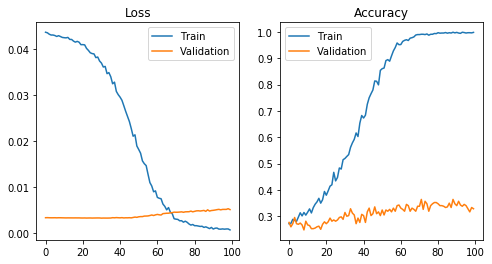

## LSTM

In [10]:
model = LSTM().cuda()
optimizer = torch.optim.Adam(model.parameters(), lr=LR, betas=BETAS, eps=EPS, weight_decay=DECAY)
train_and_evaluate(model, optimizer, data_loaders, num_epochs=EPOCHS)
del model

Training Progress: 	Epoch 1 [0/1692 (0.00%)]		Loss: 1.51417
Training Progress: 	Epoch 1 [320/1692 (18.87%)]		Loss: 1.41791
Training Progress: 	Epoch 1 [640/1692 (37.74%)]		Loss: 1.49884
Training Progress: 	Epoch 1 [960/1692 (56.60%)]		Loss: 1.45401
Training Progress: 	Epoch 1 [1280/1692 (75.47%)]		Loss: 1.48749
Training Progress: 	Epoch 1 [1600/1692 (94.34%)]		Loss: 1.44664
	Train loss: 0.04316, Accuracy: 482/1692 (28.49%)
	Validation loss: 0.00329, Accuracy: 97/423 (22.93%)
	Test loss: 0.00314, Accuracy: 104/443 (23.48%)

Training Progress: 	Epoch 2 [0/1692 (0.00%)]		Loss: 1.42401
Training Progress: 	Epoch 2 [320/1692 (18.87%)]		Loss: 1.46840
Training Progress: 	Epoch 2 [640/1692 (37.74%)]		Loss: 1.33624
Training Progress: 	Epoch 2 [960/1692 (56.60%)]		Loss: 1.34534
Training Progress: 	Epoch 2 [1280/1692 (75.47%)]		Loss: 1.39990
Training Progress: 	Epoch 2 [1600/1692 (94.34%)]		Loss: 1.33316
	Train loss: 0.04296, Accuracy: 524/1692 (30.97%)
	Validation loss: 0.00330, Accuracy: 109/423


Best validation accuracy:
0.2955

Best test accuracy:
0.2957

## Plotting Metrics v/s Number of Epochs: 
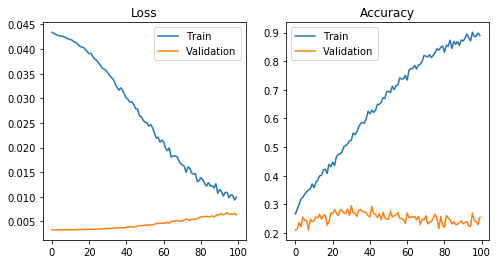

## CNN + LSTM

In [11]:
model = CNN_LSTM().cuda()
optimizer = torch.optim.Adam(model.parameters(), lr=LR, betas=BETAS, eps=EPS, weight_decay=DECAY)
train_and_evaluate(model, optimizer, data_loaders, num_epochs=EPOCHS)
del model

Training Progress: 	Epoch 1 [0/1692 (0.00%)]		Loss: 1.42300
Training Progress: 	Epoch 1 [320/1692 (18.87%)]		Loss: 1.37810
Training Progress: 	Epoch 1 [640/1692 (37.74%)]		Loss: 1.38590
Training Progress: 	Epoch 1 [960/1692 (56.60%)]		Loss: 1.38306
Training Progress: 	Epoch 1 [1280/1692 (75.47%)]		Loss: 1.39080
Training Progress: 	Epoch 1 [1600/1692 (94.34%)]		Loss: 1.38300
	Train loss: 0.04341, Accuracy: 421/1692 (24.88%)
	Validation loss: 0.00328, Accuracy: 109/423 (25.77%)
	Test loss: 0.00313, Accuracy: 111/443 (25.06%)

Training Progress: 	Epoch 2 [0/1692 (0.00%)]		Loss: 1.39463
Training Progress: 	Epoch 2 [320/1692 (18.87%)]		Loss: 1.38857
Training Progress: 	Epoch 2 [640/1692 (37.74%)]		Loss: 1.38414
Training Progress: 	Epoch 2 [960/1692 (56.60%)]		Loss: 1.38351
Training Progress: 	Epoch 2 [1280/1692 (75.47%)]		Loss: 1.39523
Training Progress: 	Epoch 2 [1600/1692 (94.34%)]		Loss: 1.36347
	Train loss: 0.04293, Accuracy: 561/1692 (33.16%)
	Validation loss: 0.00325, Accuracy: 143/42

Best validation accuracy:
0.4822

Best test accuracy:
0.5350

## Plotting Metrics v/s Number of Epochs:
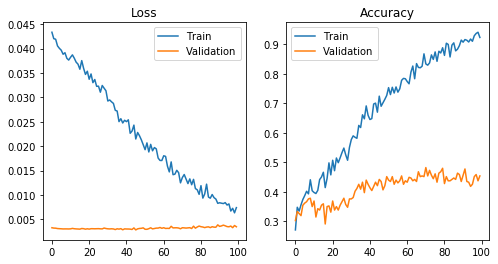

## GRU

In [12]:
model = GRU().cuda()
optimizer = torch.optim.Adam(model.parameters(), lr=LR, betas=BETAS, eps=EPS, weight_decay=DECAY)
train_and_evaluate(model, optimizer, data_loaders, num_epochs=EPOCHS)
del model

Training Progress: 	Epoch 1 [0/1692 (0.00%)]		Loss: 1.54475
Training Progress: 	Epoch 1 [320/1692 (18.87%)]		Loss: 1.47711
Training Progress: 	Epoch 1 [640/1692 (37.74%)]		Loss: 1.48251
Training Progress: 	Epoch 1 [960/1692 (56.60%)]		Loss: 1.41522
Training Progress: 	Epoch 1 [1280/1692 (75.47%)]		Loss: 1.43397
Training Progress: 	Epoch 1 [1600/1692 (94.34%)]		Loss: 1.39656
	Train loss: 0.04328, Accuracy: 474/1692 (28.01%)
	Validation loss: 0.00331, Accuracy: 110/423 (26.00%)
	Test loss: 0.00319, Accuracy: 98/443 (22.12%)

Training Progress: 	Epoch 2 [0/1692 (0.00%)]		Loss: 1.40604
Training Progress: 	Epoch 2 [320/1692 (18.87%)]		Loss: 1.49009
Training Progress: 	Epoch 2 [640/1692 (37.74%)]		Loss: 1.41010
Training Progress: 	Epoch 2 [960/1692 (56.60%)]		Loss: 1.41484
Training Progress: 	Epoch 2 [1280/1692 (75.47%)]		Loss: 1.38825
Training Progress: 	Epoch 2 [1600/1692 (94.34%)]		Loss: 1.36391
	Train loss: 0.04295, Accuracy: 532/1692 (31.44%)
	Validation loss: 0.00332, Accuracy: 98/423 

Best validation accuracy:
0.2907

Best test accuracy:
0.2889

## Plotting Metrics v/s Number of Epochs: 
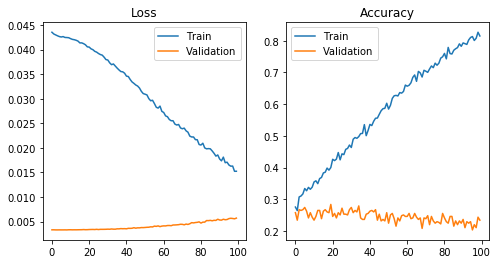

## CNN + GRU

In [13]:
model = CNN_GRU().cuda()
optimizer = torch.optim.Adam(model.parameters(), lr=LR, betas=BETAS, eps=EPS, weight_decay=DECAY)
train_and_evaluate(model, optimizer, data_loaders, num_epochs=EPOCHS)

Training Progress: 	Epoch 1 [0/1692 (0.00%)]		Loss: 1.40334
Training Progress: 	Epoch 1 [320/1692 (18.87%)]		Loss: 1.40755
Training Progress: 	Epoch 1 [640/1692 (37.74%)]		Loss: 1.39404
Training Progress: 	Epoch 1 [960/1692 (56.60%)]		Loss: 1.39243
Training Progress: 	Epoch 1 [1280/1692 (75.47%)]		Loss: 1.40018
Training Progress: 	Epoch 1 [1600/1692 (94.34%)]		Loss: 1.38327
	Train loss: 0.04337, Accuracy: 454/1692 (26.83%)
	Validation loss: 0.00327, Accuracy: 119/423 (28.13%)
	Test loss: 0.00312, Accuracy: 122/443 (27.54%)

Training Progress: 	Epoch 2 [0/1692 (0.00%)]		Loss: 1.35312
Training Progress: 	Epoch 2 [320/1692 (18.87%)]		Loss: 1.38092
Training Progress: 	Epoch 2 [640/1692 (37.74%)]		Loss: 1.35015
Training Progress: 	Epoch 2 [960/1692 (56.60%)]		Loss: 1.36225
Training Progress: 	Epoch 2 [1280/1692 (75.47%)]		Loss: 1.42665
Training Progress: 	Epoch 2 [1600/1692 (94.34%)]		Loss: 1.36361
	Train loss: 0.04336, Accuracy: 451/1692 (26.65%)
	Validation loss: 0.00327, Accuracy: 115/42

Best validation accuracy:
0.5555

Best test accuracy:
0.5395

## Plotting Metrics v/s Number of Epochs: 
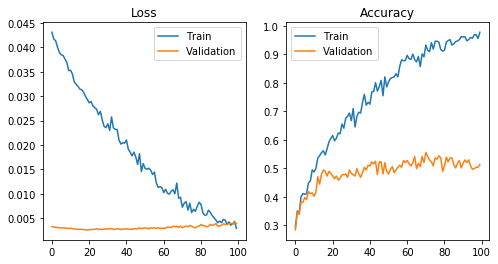